# Example 1: Simple linear regression


The purpose of this example is to become familiar with univariate linear models (with one explanatory variable). This example is an application of a univariate linear regression on the 'lifesat' data, available in the 'datasets' folder of the project. 

For this example, we will need the following libraries:

In [1]:
import os # interfacing with the operating system
import matplotlib.pyplot as plt # vizualization
import numpy as np # scientific computing and linear algebra
import pandas as pd # create and handling DataFrames
import sklearn.linear_model # contains a set of methods for linear models

We assume that we want to know if money makes you happy... using 2015 'Better Life Index' (BLI) data (source: [OECD](https://stats.oecd.org/index.aspx?DataSetCode=BLI)) and GDP data (source: [IMF](https://www.imf.org/en/Publications/SPROLLs/world-economic-outlook-databases#sort=%40imfdate%20descending)). We will see in the following that a linear trend can be observed between life satisfaction and GDP. In other words, **life satisfaction increases linearly with the GDP of a country**.

## 1) Preparation of the data

We can load the 'oecd_bli' data, as well as the 'gdp_per_capita' data (already available in the project folder). The 'lifesat' data are obtained by making a join of these two tables.

We start by loading the OECD data:

In [2]:
oecd_bli_path = os.path.join(os.getcwd(), "datasets", "lifesat", "oecd_bli_2015.csv")
# os.getcwd(): get the current path directory
oecd_bli = pd.read_csv(oecd_bli_path, thousands=',')

oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


Puis on charge les données du FMI:

In [3]:
gdp_per_capita_path = os.path.join(os.getcwd(), "datasets", "lifesat", "gdp_per_capita.csv")

gdp_per_capita = pd.read_csv(gdp_per_capita_path, thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")

gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [4]:
# Only rows measuring "total" inequality are selected
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]

# The table is rotated so that the countries are in rows and the indicators in columns
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

oecd_bli.head()

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2


In [5]:
# The column '2015' is renamed 'GDP per capita' (which will later be the variable to explain)
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)

# The variable 'Country' becomes the index of the DataFrame (which will be the joining key)
gdp_per_capita.set_index("Country", inplace=True)

# The joining between 'oecd_bli' (left) and 'gdp_per_capita' (right) is performed 
# The joining key corresponds to the index (Country)
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                              left_index=True, right_index=True)

# Rows are sorted in ascending order of 'GDP per capita' values
full_country_stats.sort_values(by="GDP per capita", inplace=True)

# We keep only the two variables that interest us
lifesat = full_country_stats[["GDP per capita", 'Life satisfaction']]

lifesat.head()

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9


## 2) Some data vizualization

Let's start by displaying a scatterplot. We can observe a positive linear trend between GDP and satisfaction.

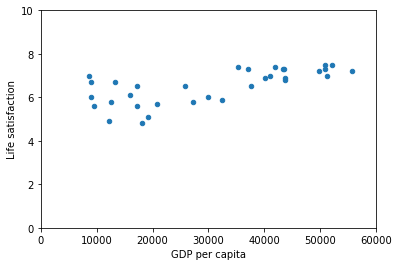

In [6]:
lifesat.plot(kind = 'scatter', x = 'GDP per capita', y = 'Life satisfaction')
plt.axis([0, 60000, 0, 10])
plt.show()

We can also calculate the correlation coefficient between these two variables.

In [7]:
# convert X and y into np-arrays
X = np.c_[lifesat["GDP per capita"]]
y = np.c_[lifesat["Life satisfaction"]]

# function corrcoef
np.corrcoef(X, y, rowvar=False)

array([[1.        , 0.63569646],
       [0.63569646, 1.        ]])

We can finally visualize the distribution of these two variables, using a histogram.

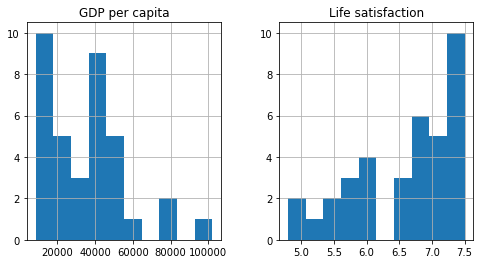

In [8]:
lifesat.hist(figsize=(8,4))
plt.show()

## 3) Model selection and learning 

We choose a linear model of the variable 'Life satisfaction', with an explanatory variable: 'GDP', as follows:
$$ \text{Life Satisfaction} = \theta_0 + \theta_1 \times \text{GDP per capita}$$

that can be written as:

$$ y = \theta_0 + \theta_1 x$$

with

- $y$: la variable à expliquer ('Life Satisfaction'),
- $x$: la variable explicative ('GDP per capita').



The goal is to estimate the two parameters $\theta_0$ (the constant or intercept) and $\theta_1$ (the slope).

To do so, we use the `LinearRegression()` function of the `linear_model` module of scikit-learn.

The model is then estimated with the function `fit()` (the result of this function is stored in an object called `fit`). We can then extract some information from this model, notably the coefficient of determination $R^2$, defined by

$$ R^2 = 1 - \frac{RSS}{TSS},$$

where RSS is the *residual sum of squares* defined by

$$ RSS = \sum_{i=1}^n (y_i - \hat{y}_i)^2$$

with $y_i$ the observed value of $y$ for individual $i$, and $\hat{y}_i$ its value predicted by the model, and TSS is the *total sum of squares* defined by

$$ TSS = \sum_{i=1}^n (y_i - \bar{y})^2$$

and $\bar{y} = \frac{1}{n} \sum_{i=1}^n y_i$.

$R^2$ is a value between 0 and 1, where 1 represents the best possible model. Another way to define it is to consider the square of the linear correlation coefficient between $y$ and $\hat{y}$.

$R^2$ is obtained with the function `score()` applied to the fit object. The slope ($\theta_1$) and the constant ($\theta_0$) are obtained respectively with the `coef_` and `intercept_` attributes of the `fit' object.

In [9]:
# Select the model
model = sklearn.linear_model.LinearRegression()

# Learning (or training) the model
model.fit(X,y)

# (R-squared)
print("R2", model.score(X,y))

# Slope of the linear model
print("Pente", model.coef_)

# Constante of the model
print("Constante", model.intercept_)

R2 0.40410998750014104
Pente [[2.3177337e-05]]
Constante [5.76302986]


We can now display the previous scatterplot again, and add the regression line corresponding to our estimated model.

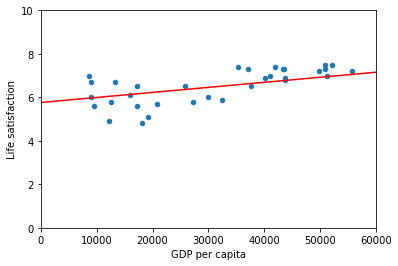

In [10]:
lifesat.plot(kind = 'scatter', x = 'GDP per capita', y = 'Life satisfaction')
plt.axis([0, 60000, 0, 10])
X = np.linspace(0, 60000, 1000) # on crée 1000 valeurs de X allant de 0 à 60000
theta_0 = model.intercept_.item() # extrait la valeur de la constante
theta_1 = model.coef_.item() # extrait la valeur de la pente
Y = X*theta_1 + theta_0 # on calcule Y = theta_1 * x + theta_0
plt.plot(X,Y, "r") # on ajoute la droite de régression
plt.show()

## 4) Model predictions

The function `predict()` allows to make predictions from new data (values of $x$ or GDP). For example, we can predict the level of life satisfaction for countries that do not initially appear in the OECD data. The following example shows the estimated level of satisfaction for Albania.

In [11]:
GDP_Albania = gdp_per_capita.loc[['Albania']]['GDP per capita']

model.predict(np.c_[GDP_Albania])

array([[5.8556322]])

This prediction can also be obtained for several countries simultaneously.

In [12]:
new_GDP = gdp_per_capita.loc[['Albania', 'Afghanistan']]['GDP per capita']

print(new_GDP)

model.predict(np.c_[new_GDP])

Country
Albania        3995.383
Afghanistan     599.994
Name: GDP per capita, dtype: float64


array([[5.8556322 ],
       [5.77693612]])

## Other methods (OLS with statsmodels)

When using Machine Learning models, the objective is to maximize the performance of the model in terms of prediction (we will see this in the next tutorial), without necessarily being more interested in the interpretation of the coefficients of the model (the $\theta$ vector). For more detailed results of the linear model (close to what we get with the `lm()` function in R), we can also use the 'statsmodels' library. 

In [13]:
import statsmodels.api as sm

# convert X and y into np-arrays
X = np.c_[lifesat["GDP per capita"]]
y = np.c_[lifesat["Life satisfaction"]]

# add constant in X
X2 = sm.add_constant(X)

# Select an OLS model
est = sm.OLS(y, X2)

# Fit the model
fit = est.fit()

# print th summary (similar to R)
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     23.06
Date:                Sun, 11 Sep 2022   Prob (F-statistic):           3.10e-05
Time:                        14:57:48   Log-Likelihood:                -32.726
No. Observations:                  36   AIC:                             69.45
Df Residuals:                      34   BIC:                             72.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7630      0.199     28.890      0.000       5.358       6.168
x1          2.318e-05   4.83e-06      4.802      0.000    1.34e-05     3.3e-05
==============================================================================
Omnibus:                        2.557   Durbin-Watson:                   0.887
Prob(Omnibus):                  0.278   Jarque-Bera (JB):                2.291
Skew:                          -0.595   Prob(JB):                        0.318
Kurtosis:                       2.665   Cond. No.                     8.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Exercise

Try to estimate a model with `LinearRegression`, considering more variables, you can use the `full_country_stats.csv` data.